<a href="https://colab.research.google.com/github/Mannienox/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/exercise_submissions/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/arewadataScience/ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/week4/week_4_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 2.0
### Ibrahim Manasseh
### mannienokson@gmail.com

### WEEK 4 Exercises

### 1. What are 3 areas in industry where computer vision is currently being used?

In the industry, Computer vision is applied in:
1. Object detection
2. Character recognition
3. Image Segmentation


### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is a case where a model performs well on the training set and performs poorly on the test set.

### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

1. **Data Augmentation:** This is the process of creating new samples by adding random transformations to already existing samples
2. **Increasing the training size**: Fewer training samples can make create a case of overfitting.
3. **Feature Selection:** Selecting only the relevant features reduces the chances of overfitting

5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [1]:
import torch
from torchvision import datasets
from torch import nn
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform=ToTensor()
)

len(train_data), len(test_data)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 344kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.76MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.09MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(60000, 10000)

6. Visualize at least 5 different samples of the MNIST training dataset.

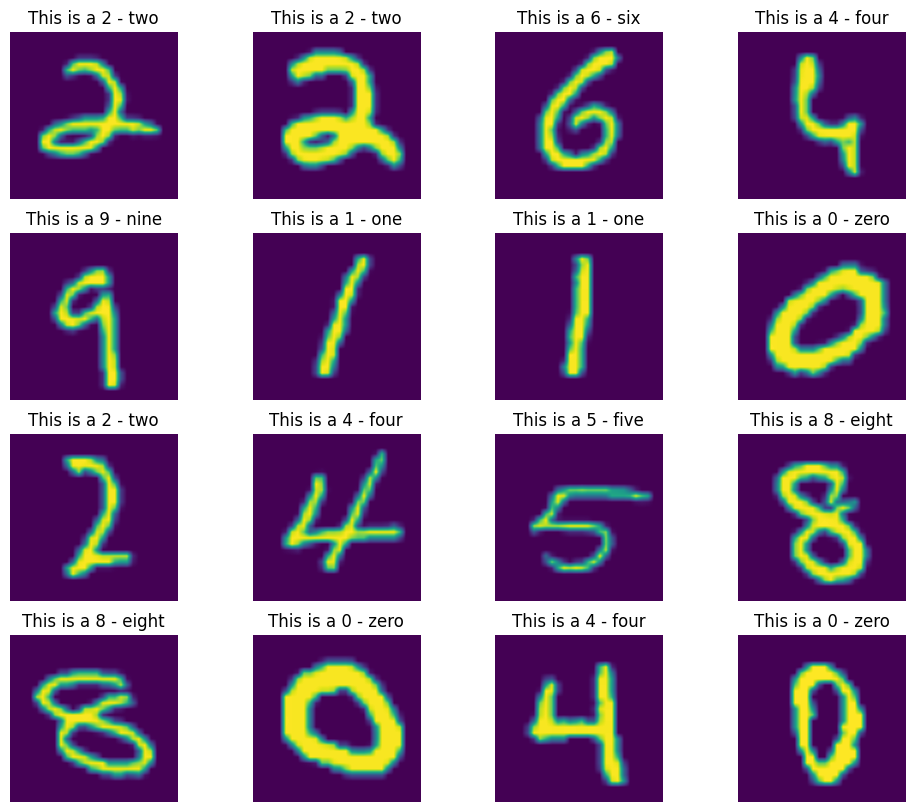

In [2]:
rows, cols = 4,4
fig, ax = plt.subplots(rows, cols, figsize = (12,10))

for row in range(rows):
  for col in range (cols):
    rand_idx = torch.randint(len(train_data), size = [1]).item()
    image, label = train_data[rand_idx]
    ax[row,col].imshow(image.squeeze(), interpolation = 'bilinear')
    ax[row,col].set_title(f'This is a {train_data.classes[label]}')
    ax[row,col].axis('Off')

7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.


In [3]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle = True
)

test_loader = DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = True
)

len(train_loader), len(test_loader)

(1875, 313)

8. Recreate `model_2` used in this notebook (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [4]:
class CNNClassifier(nn.Module):
  def __init__(self, input_size, hidden_units, output_size):
    super().__init__()

    #Layer 1
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=input_size, out_channels = hidden_units, kernel_size=3, padding = 1),
        nn.Tanh(),
        nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size=3, padding = 1),
        nn.Tanh(),
        nn.MaxPool2d(kernel_size=2)
    )

    #Layer 2
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size=3, padding = 1),
        nn.Tanh(),
        nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size=3, padding = 1),
        nn.Tanh(),
        nn.MaxPool2d(kernel_size=2)
    )

    # CLassifier
    self.classifier = nn. Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*7*7, output_size)
    )

  def forward(self, x):
    return self.classifier(self.layer2(self.layer1(x)))


torch.manual_seed(42)

cnn = CNNClassifier(
    input_size = 1,
    hidden_units=10,
    output_size=len(train_data.classes)
)
cnn


CNNClassifier(
  (layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Tanh()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Tanh()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Tanh()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Tanh()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

def train_test_loop(model, loss_fn, optimizer, accuracy_score, epochs = 3, device = 'cpu'):
  model.to(device)
  for epoch in range(epochs):
    train_loss, train_acc = [],[]
    for batch, (X,y) in enumerate(train_loader):
      X, y = X.to(device), y.to(device)
      model.train()
      y_logits = model(X)
      y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
      loss = loss_fn(y_logits, y)
      train_acc.append(accuracy_score(y_pred.cpu(), y.cpu())*100)
      train_loss.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


    model.eval()
    test_loss, test_acc = [],[]
    for batch, (X,y) in enumerate(test_loader):
      X, y = X.to(device), y.to(device)
      with torch.inference_mode():
        test_logits = model(X)
        test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
        test_acc.append(accuracy_score(test_pred.cpu(), y.cpu())*100)
        test_loss.append(loss_fn(test_logits, y).item())

    print(f'Epoch: {epoch} _____________')
    print(f'Train Accuracy: {np.mean(train_acc)} // Train Loss: {np.mean(train_loss)}')
    print(f'Test Accuracy: {np.mean(test_acc)} // Test Loss: {np.mean(test_loss)}\n')

In [6]:
#Training on GPU
train_test_loop(
    model = cnn,
    loss_fn = nn.CrossEntropyLoss(),
    optimizer = torch.optim.SGD(params = cnn.parameters(), lr = 0.1),
    accuracy_score = accuracy_score,
    device = 'cuda'
)

Epoch: 0 _____________
Train Accuracy: 92.31833333333333 // Train Loss: 0.24647833492159843
Test Accuracy: 97.2444089456869 // Test Loss: 0.09002259891991989

Epoch: 1 _____________
Train Accuracy: 97.50666666666666 // Train Loss: 0.08549440496104459
Test Accuracy: 98.03314696485623 // Test Loss: 0.06130280151603202

Epoch: 2 _____________
Train Accuracy: 98.05166666666666 // Train Loss: 0.06425895307902246
Test Accuracy: 98.34265175718849 // Test Loss: 0.05337276867741106



In [7]:
from datetime import datetime

def train_time (model, loss_fn, optimizer, accuracy_score, epochs = 3, device = 'cpu'):
  t1 = datetime.now()
  train_test_loop(model, loss_fn, optimizer, accuracy_score, epochs, device)
  t2 = datetime.now()
  diff = t2-t1
  return diff.seconds

In [8]:
torch.manual_seed(42)

#GPU
model_1 = CNNClassifier(1,10,len(train_data.classes))
gpu_train_time = train_time(model = model_1,
                          loss_fn = nn.CrossEntropyLoss(),
                          optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1),
                          accuracy_score = accuracy_score,
                          epochs = 3,
                          device = 'cuda')
print(f'GPU Train Time: {gpu_train_time} seconds')
print('___________________________________________________\n\n')

#CPU
model_2 = CNNClassifier(1,10,len(train_data.classes))
cpu_train_time = train_time(model = model_2,
                          loss_fn = nn.CrossEntropyLoss(),
                          optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1),
                          accuracy_score = accuracy_score,
                          epochs = 3,
                          device = 'cpu')
print(f'CPU Train Time: {cpu_train_time} seconds')

Epoch: 0 _____________
Train Accuracy: 92.31333333333333 // Train Loss: 0.24645552071010074
Test Accuracy: 97.2444089456869 // Test Loss: 0.08996197231078205

Epoch: 1 _____________
Train Accuracy: 97.50166666666667 // Train Loss: 0.08547382287631432
Test Accuracy: 98.02316293929712 // Test Loss: 0.06144191526224652

Epoch: 2 _____________
Train Accuracy: 98.045 // Train Loss: 0.06428656053089847
Test Accuracy: 98.3326677316294 // Test Loss: 0.053428601995021245

GPU Train Time: 58 seconds
___________________________________________________


Epoch: 0 _____________
Train Accuracy: 93.12333333333333 // Train Loss: 0.22570905095537502
Test Accuracy: 97.2344249201278 // Test Loss: 0.0913353076207633

Epoch: 1 _____________
Train Accuracy: 97.735 // Train Loss: 0.07500705703683197
Test Accuracy: 98.31269968051119 // Test Loss: 0.05013610277036294

Epoch: 2 _____________
Train Accuracy: 98.25 // Train Loss: 0.057196261057195566
Test Accuracy: 98.45247603833866 // Test Loss: 0.04626046066297

### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [63]:
def predict(model, data_loader, loss_fn, device = 'cpu'):
  model.to(device)
  model.eval()
  images, loss, accuracy, prediction, true_value = [],[],[],[],[]
  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device), y.to(device)
    with torch.inference_mode():
      logits = model(X)
      pred = torch.softmax(logits, dim = 1).argmax(dim = 1)
      accuracy.append(accuracy_score(pred.cpu(), y.cpu())*100)
      loss.append(loss_fn(logits, y).item())
      for i in range(len(X)):
        prediction.append(pred[i])
        true_value.append(y[i])
        images.append(X[i])

  accuracy = np.mean(accuracy)
  loss = np.mean(loss)
  return images, torch.tensor(prediction), torch.tensor(true_value), accuracy, loss

In [64]:
test_list, prediction, true_value, accuracy, loss = predict(
    cnn,
    test_loader,
    loss_fn = nn.CrossEntropyLoss(),
    device = 'cuda'
)

print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')

Accuracy: 98.34265175718849
Loss: 0.053361254400378776


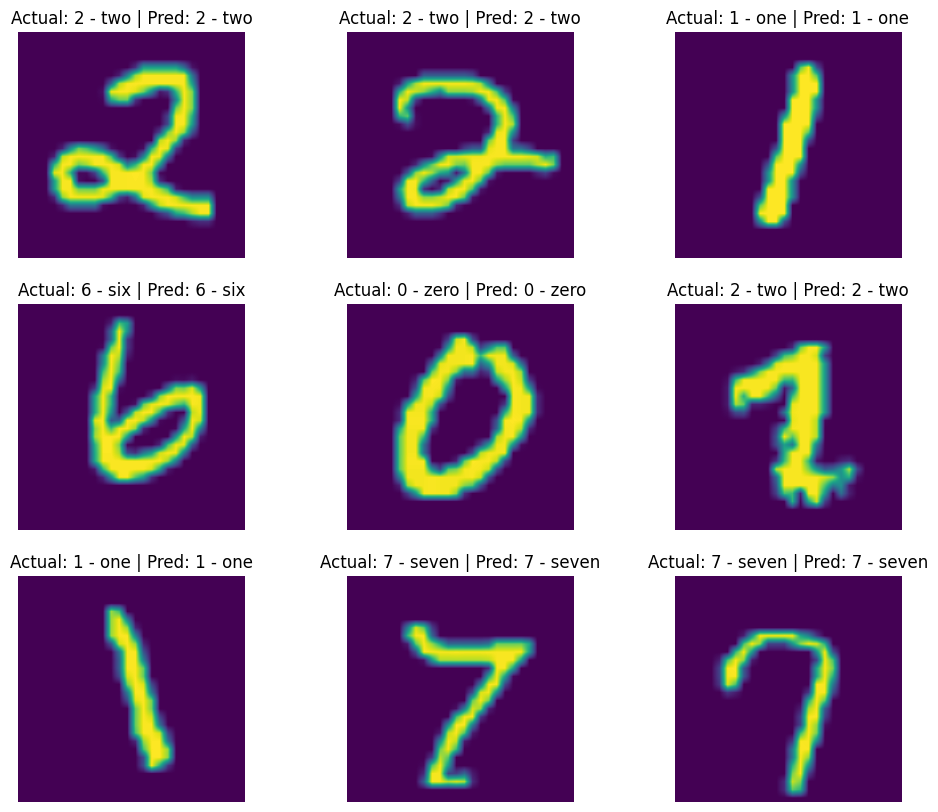

In [66]:
torch.manual_seed(42)

rows, cols = 3,3
fig, ax = plt.subplots(rows, cols, figsize = (12,10))

for row in range(rows):
  for col in range (cols):
    rand_idx = torch.randint(len(test_list), size = [1]).item()
    image, label, pred = list(zip(test_list, true_value, prediction))[rand_idx]
    ax[row,col].imshow(image.cpu().squeeze(), interpolation = 'bilinear')
    ax[row,col].set_title(f'Actual: {train_data.classes[label]} | Pred: {train_data.classes[pred]}')
    ax[row,col].axis('Off')

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels.


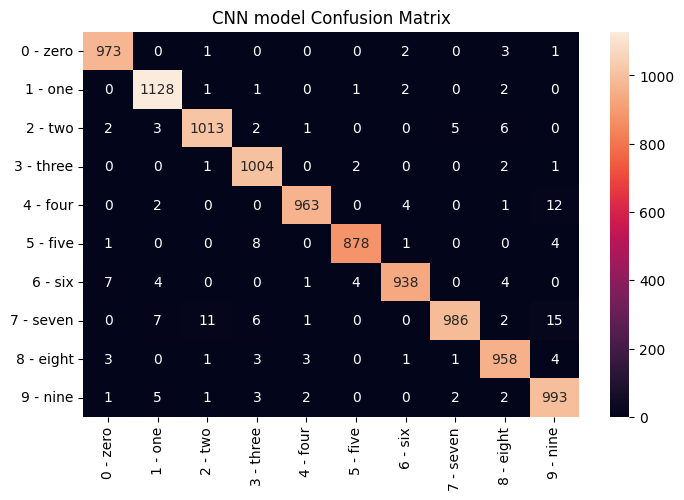

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (8,5))
conf_mat = confusion_matrix(true_value, prediction)
sns.heatmap(conf_mat, xticklabels=train_data.classes, yticklabels=train_data.classes, annot = True, fmt = '.0f')
plt.title('CNN model Confusion Matrix')
plt.show()

### 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?


In [81]:
random_tensor = torch.rand([1, 3, 64, 64])
for k in range(1,10):
  conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=k, padding=1)
  shape = conv_layer(random_tensor).shape
  print(f'Kernel size {k}, Shape = {shape}')

Kernel size 1, Shape = torch.Size([1, 10, 66, 66])
Kernel size 2, Shape = torch.Size([1, 10, 65, 65])
Kernel size 3, Shape = torch.Size([1, 10, 64, 64])
Kernel size 4, Shape = torch.Size([1, 10, 63, 63])
Kernel size 5, Shape = torch.Size([1, 10, 62, 62])
Kernel size 6, Shape = torch.Size([1, 10, 61, 61])
Kernel size 7, Shape = torch.Size([1, 10, 60, 60])
Kernel size 8, Shape = torch.Size([1, 10, 59, 59])
Kernel size 9, Shape = torch.Size([1, 10, 58, 58])


We can clearly see that as the kernel size increases by 1, the size of our inner tensor reduces by 1

### 13. Use a model similar to the trained `model_2` from this notebook to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
    * Then plot some predictions where the model was wrong alongside what the label of the image should've been.
    * After visualizing these predictions do you think it's more of a modelling error or a data error?
    * As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [82]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform=ToTensor()
)

len(train_data), len(test_data)

100%|██████████| 26.4M/26.4M [00:00<00:00, 111MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 4.31MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 66.9MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.2MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(60000, 10000)

In [83]:
train_loader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle = True
)

test_loader = DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = True
)

len(train_loader), len(test_loader)

(1875, 313)

In [84]:
model_3 = CNNClassifier(input_size=1, hidden_units=10, output_size=len(train_data.classes))
train_test_loop(
    model = model_3,
    loss_fn = nn.CrossEntropyLoss(),
    optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1),
    accuracy_score = accuracy_score,
    device = 'cuda'
)

Epoch: 0 _____________
Train Accuracy: 82.855 // Train Loss: 0.47257059139410657
Test Accuracy: 87.76956869009585 // Test Loss: 0.3465255901169853

Epoch: 1 _____________
Train Accuracy: 88.57166666666667 // Train Loss: 0.31933517326712607
Test Accuracy: 86.45167731629392 // Test Loss: 0.38128324049397017

Epoch: 2 _____________
Train Accuracy: 89.78833333333333 // Train Loss: 0.2852804157912731
Test Accuracy: 89.11741214057508 // Test Loss: 0.2999571345437068



In [85]:
test_list, prediction, true_value, accuracy, loss = predict(
    model_3,
    test_loader,
    loss_fn = nn.CrossEntropyLoss(),
    device = 'cuda'
)

print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')

Accuracy: 89.10742811501598
Loss: 0.29995104621726865


In [93]:
wrong_predictions = [x for x in zip(test_list, true_value, prediction) if x[1] != x[2]]
len(wrong_predictions)

1090

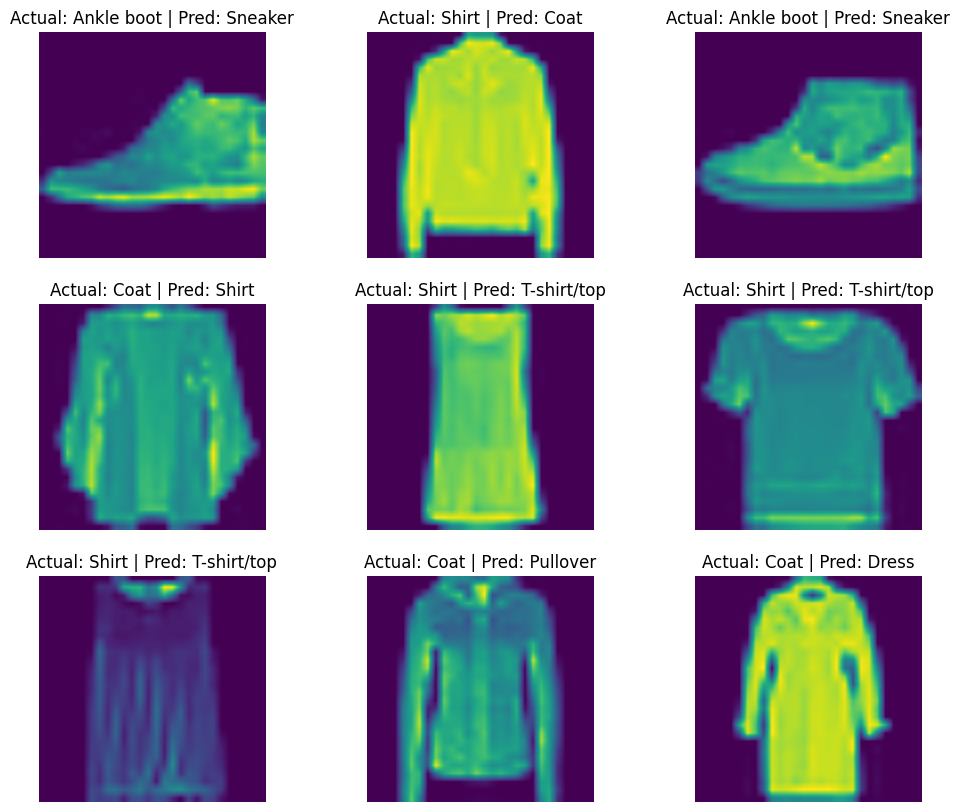

In [94]:
torch.manual_seed(42)

rows, cols = 3,3
fig, ax = plt.subplots(rows, cols, figsize = (12,10))

for row in range(rows):
  for col in range (cols):
    rand_idx = torch.randint(len(wrong_predictions), size = [1]).item()
    image, label, pred = wrong_predictions[rand_idx]
    ax[row,col].imshow(image.cpu().squeeze(), interpolation = 'bilinear')
    ax[row,col].set_title(f'Actual: {train_data.classes[label]} | Pred: {train_data.classes[pred]}')
    ax[row,col].axis('Off')

From the predictions, the data points are too close to each other as we can see

SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)